In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Training.csv')

In [3]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [4]:
df.shape

(4920, 133)

In [5]:
df.isnull().sum().sort_values(ascending=False)

itching                 0
spinning_movements      0
altered_sensorium       0
muscle_pain             0
irritability            0
                       ..
abdominal_pain          0
constipation            0
back_pain               0
pain_behind_the_eyes    0
prognosis               0
Length: 133, dtype: int64

In [6]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [7]:
df['prognosis'].value_counts(normalize = True)

Fungal infection                           0.02439
Hepatitis C                                0.02439
Hepatitis E                                0.02439
Alcoholic hepatitis                        0.02439
Tuberculosis                               0.02439
Common Cold                                0.02439
Pneumonia                                  0.02439
Dimorphic hemmorhoids(piles)               0.02439
Heart attack                               0.02439
Varicose veins                             0.02439
Hypothyroidism                             0.02439
Hyperthyroidism                            0.02439
Hypoglycemia                               0.02439
Osteoarthristis                            0.02439
Arthritis                                  0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Acne                                       0.02439
Urinary tract infection                    0.02439
Psoriasis                                  0.02439
Hepatitis D                    

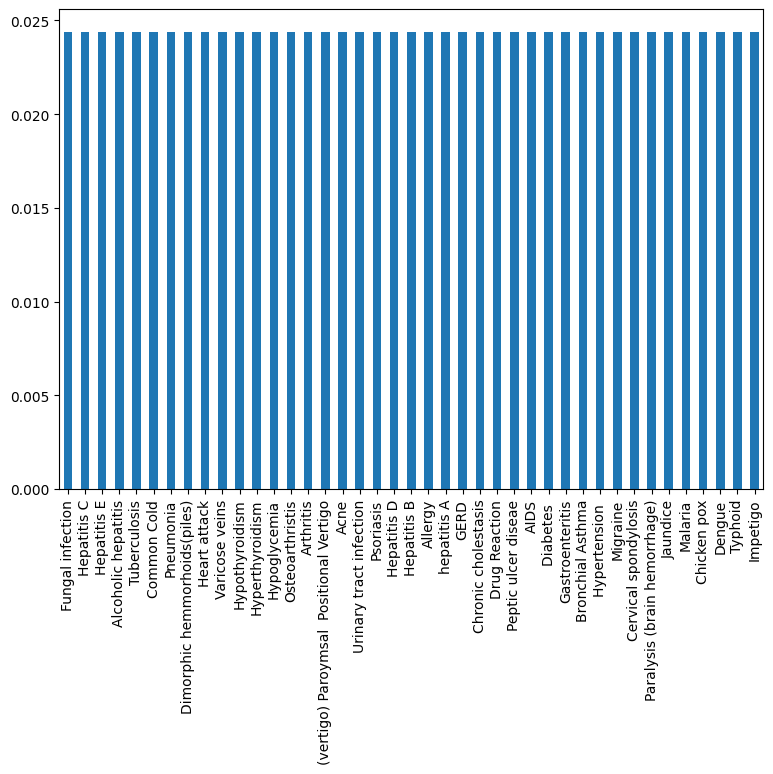

In [8]:
# plot a bar chart of the value counts of 'prognosis' column normalized to the total number of samples
df['prognosis'].value_counts(normalize=True).plot.bar()

# adjust the subplot margins
plt.subplots_adjust(left=0.9, right=2, top=2, bottom=1)

In [9]:
df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

***This code generates a countplot for each feature(column) in the given dataset df. 
It iterates over each column using the range() function, and for each column, it creates a subplot using plt.subplot() 
and adjusts the size and position of the subplots using plt.subplots_adjust(). Then, it generates a countplot for the 
current column using sns.countplot(), sets the title of the plot as the column name using set_title(), and finally, 
sets the font size of the title using the fontsize parameter.

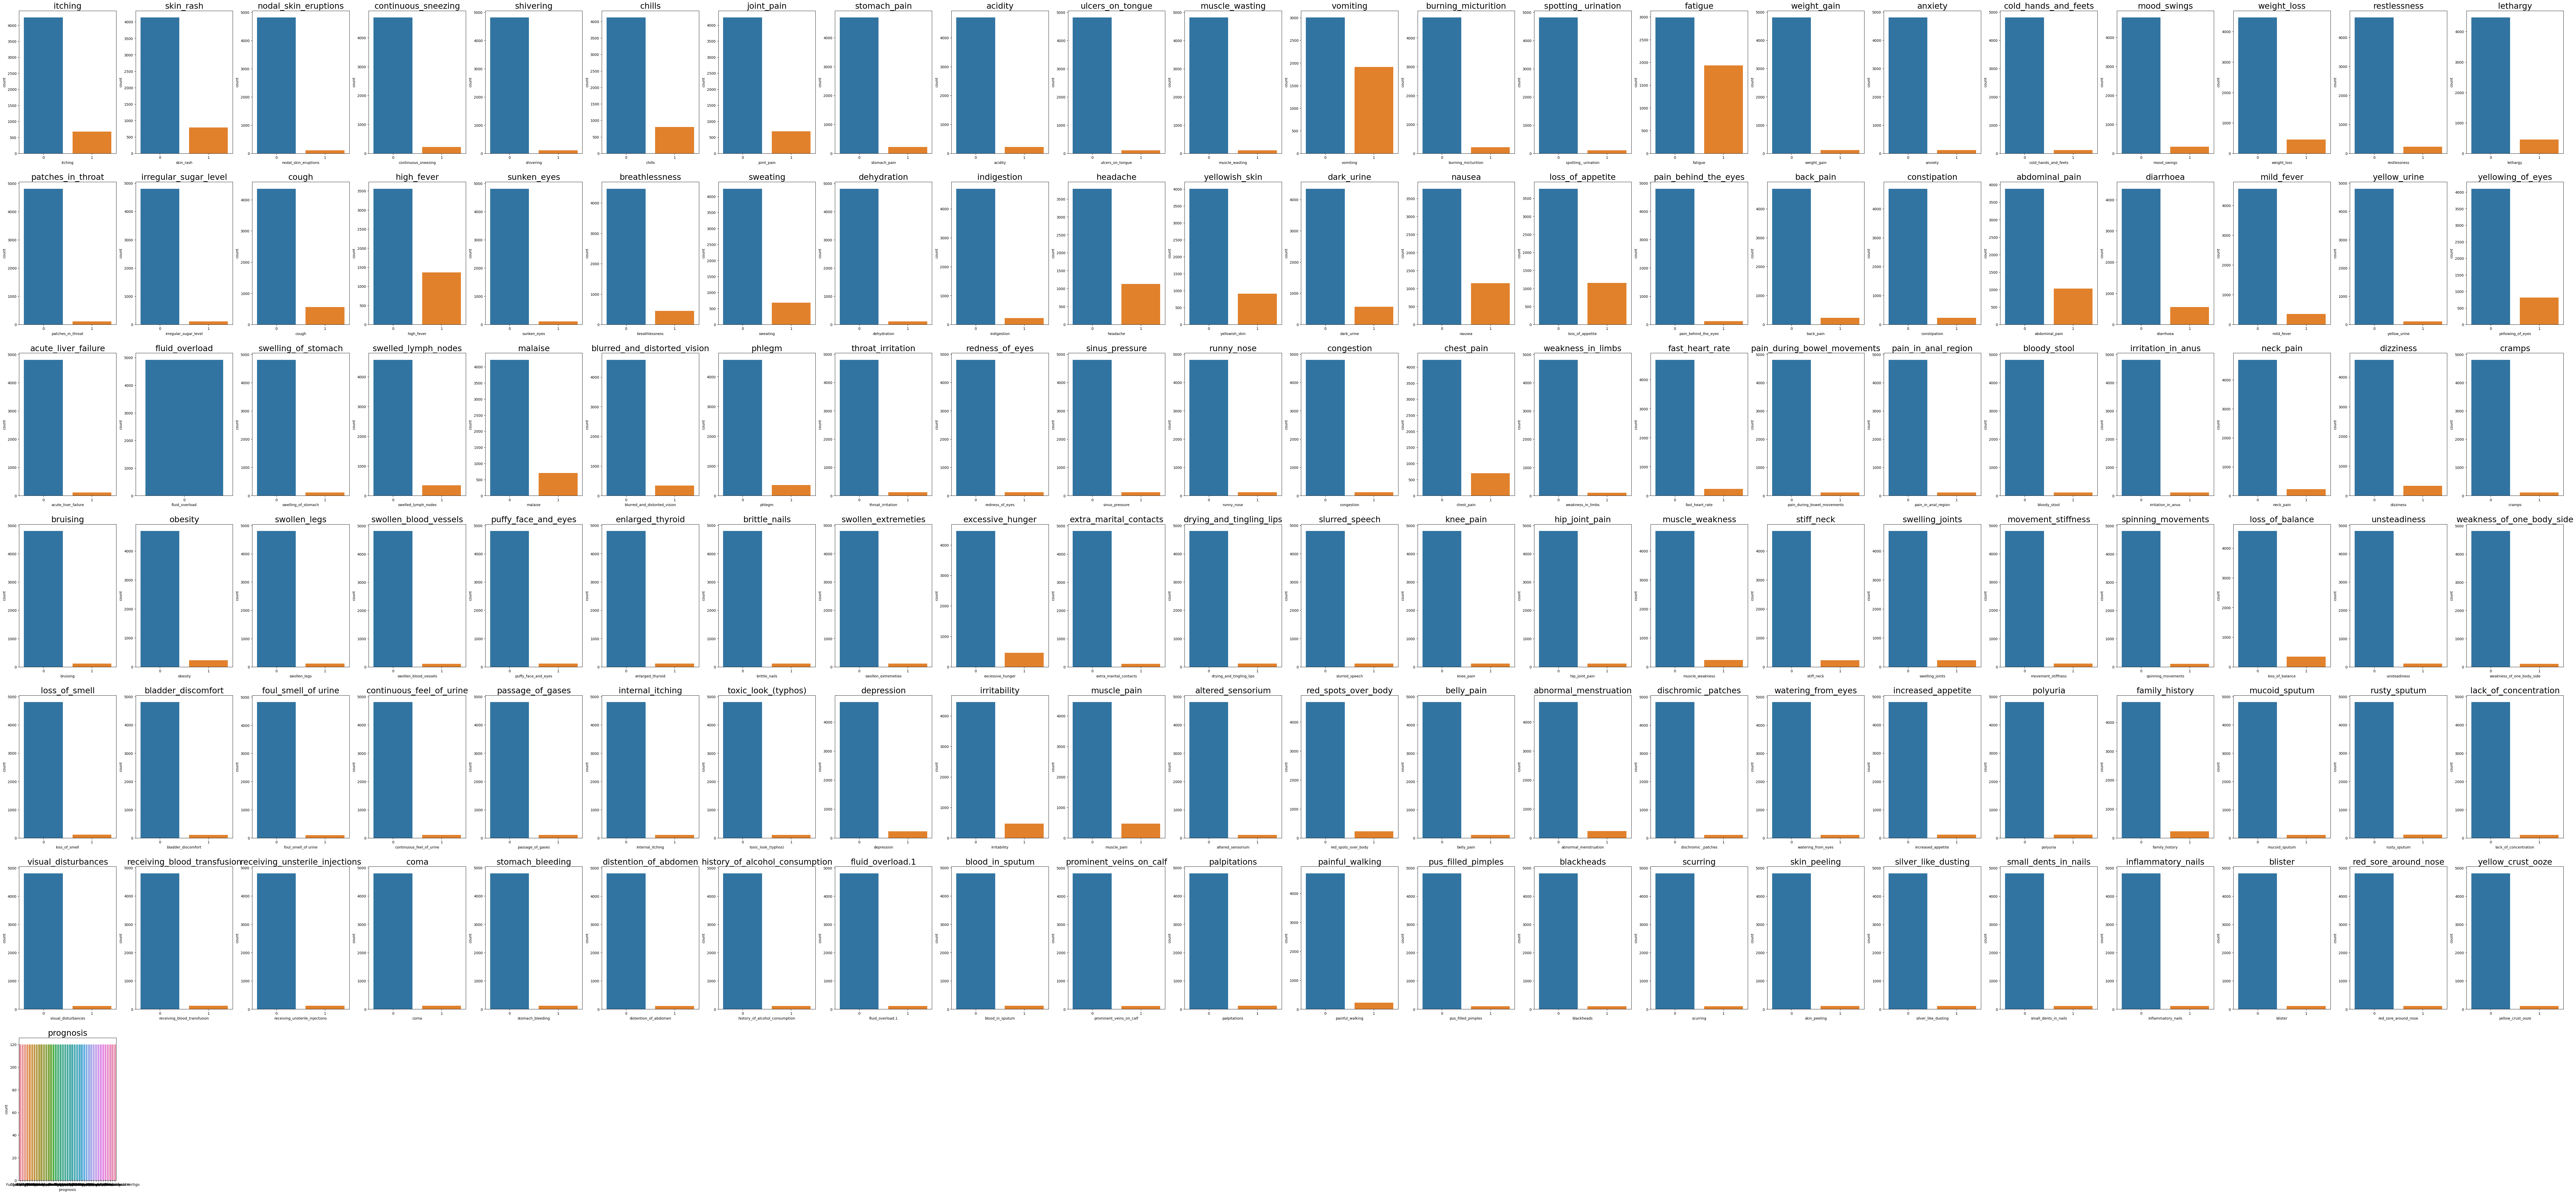

In [10]:
for x in range(df.shape[1]):
    plt.subplot(7,22,x+1)
    plt.subplots_adjust(left = 0.5, right = 16 , top = 10, bottom = 0.5)
    sns.countplot(df[df.columns[x]]).set_title(df.columns[x],fontsize=23)

In [11]:
# Compute correlation matrix
corr = df.corr()

# Create a mask to hide the lower triangle of the heatmap
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

# Adjust subplot parameters to increase size of heatmap
plt.subplots_adjust(left=0.5, right=16, top=20, bottom=0.5)

# Create and display heatmap with correlation matrix
sns.heatmap(corr, mask=mask, vmax=.9, square=True, annot=True, cmap="YlGnBu")


<AxesSubplot:>

In [12]:
pd.crosstab(df['cold_hands_and_feets'],df['weight_gain'])

weight_gain              0    1
cold_hands_and_feets           
0                     4800    6
1                        6  108

***This code creates a contingency table, also known as a cross-tabulation table, 
using the "cold_hands_and_feets" and "weight_gain" columns of the DataFrame "df". 
The table shows the count of occurrences of each combination of values for these two columns.

In [13]:
from scipy.stats import chi2_contingency

***This code is performing a chi-squared test of independence on a contingency table created using the crosstab function of pandas. The contingency table is created from the variables "cold_hands_and_feets" and "weight_gain" in the given dataframe "df". The chi2_contingency function from the scipy library is used to calculate the test statistic, p-value, degrees of freedom, and expected frequencies.

In [14]:
chi2_contingency(pd.crosstab(df['cold_hands_and_feets'],df['weight_gain']))

Chi2ContingencyResult(statistic=4362.40173527245, pvalue=0.0, dof=1, expected_freq=array([[4.69464146e+03, 1.11358537e+02],
       [1.11358537e+02, 2.64146341e+00]]))

***The code x = df.drop(['prognosis'],axis =1) creates a new DataFrame x which contains all the columns of the original DataFrame df except for the 'prognosis' column. The parameter axis=1 specifies that we want to drop a column.

***The code y = df['prognosis'] creates a new pandas Series y which contains the values of the 'prognosis' column from the original DataFrame df. We are using this column as the target variable in our machine learning models.

In [15]:
x = df.drop(['prognosis'],axis =1)
y = df['prognosis']

***The code imports the train_test_split function from the sklearn.model_selection module. 
This function is used to split a dataset into training and testing subsets. 
It randomly splits the data into two parts based on the test_size parameter, 
which specifies the proportion of the dataset that should be used for testing. 
The train_test_split function returns four arrays: X_train, X_test, y_train, and y_test, 
where X contains the features and y contains the target variable.

In [16]:
from sklearn.model_selection import train_test_split

***The code is performing a train-test split on the dataset. 
It splits the input features and output target into four subsets: x_train (training input data), 
x_test (testing input data), y_train (training output data), and y_test (testing output data). 
The function train_test_split from the sklearn.model_selection module is used to perform the split. 
The test_size parameter specifies the proportion of the data that should be used for testing,
while the random_state parameter sets the seed for the random number generator, ensuring that the split is reproducible.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

***This line of code imports the MultinomialNB class from the sklearn.naive_bayes module. 
MultinomialNB is a class used for implementing the Naive Bayes algorithm for text classification tasks 
where the features are discrete word counts

In [18]:
from sklearn.naive_bayes import MultinomialNB

***The code you provided is training a Naive Bayes classifier using the MultinomialNB class from the scikit-learn library.
mnb = MultinomialNB() creates an instance of the MultinomialNB class.
mnb = mnb.fit(x_train, y_train) trains the classifier using the fit() method of the MultinomialNB object,
with the training data x_train and y_train. The method uses the Naive Bayes algorithm to learn how to classify new data
based on the patterns it discovers in the training set.

In [19]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

***This import statement imports the accuracy_score function from the sklearn.metrics module. 
The accuracy_score function is used to compute the accuracy classification score of the predicted output.

In [20]:
from sklearn.metrics import accuracy_score

***This line of code uses the trained Multinomial Naive Bayes classifier mnb to predict the target variable values 
for the test features x_test. The predicted values are stored in the variable y_pred.

In [21]:
y_pred = mnb.predict(x_test)

***This code calculates the accuracy score of the predicted values y_pred against the actual test values y_test using
the accuracy_score function from the sklearn.metrics library. 
The accuracy score represents the proportion of correctly classified instances out of all instances in the test set.

In [22]:
accuracy_score(y_pred,y_test)

1.0

***This code performs cross-validation on the trained Multinomial Naive Bayes model mnb using the cross_val_score 
function from the sklearn.model_selection module.

***The function takes in the following arguments:
mnb: the trained Multinomial Naive Bayes model
x_test: the test data features
y_test: the test data labels
cv: the number of folds for cross-validation (in this case, cv=3)
The function returns an array of scores for each fold of the cross-validation. 
The mean score is also printed using the scores.mean() function.

***The purpose of cross-validation is to estimate the performance of the model on new, 
unseen data. It does this by splitting the data into a number of folds, training the model on a subset of the data,
and testing the model on the remaining data. This process is repeated for each fold, and the scores are averaged to get an estimate of the model's performance.

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

[1. 1. 1.]
1.0


***This line of code is creating a variable called real_diseases that stores the actual disease labels 
from the test set (y_test). The values method is used to convert the Pandas Series object into a NumPy array. 
This is often done to make it easier to work with the data using certain machine learning libraries like scikit-learn.

In [24]:
real_diseases = y_test.values

***The code iterates over the predicted and actual values of the diseases for each instance in the test dataset. 
If the predicted value matches the actual value, it prints the predicted and actual values. Otherwise, 
it prints that the prediction was wrong and also prints the predicted and actual values for that instance.

In [25]:
for i in range(0, len(real_diseases)):
    if y_pred[i] == real_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))

Pred: Acne Actual:Acne
Pred: Acne Actual:Acne
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: AIDS Actual:AIDS
Pred: Chronic cholestasis Actual:Chronic cholestasis
Pred: Hypertension  Actual:Hypertension 
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Arthritis Actual:Arthritis
Pred: Hepatitis B Actual:Hepatitis B
Pred: Migraine Actual:Migraine
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: Diabetes  Actual:Diabetes 
Pred: Hepatitis D Actual:Hepatitis D
Pred: Psoriasis Actual:Psoriasis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: Hepatitis E Actual:Hepatitis E
Pred: Diabetes  Actual:Diabetes 
Pred: Cervical spondylosis Actual:Cervical spondylosis
Pred: Bronchial Asthma Actual:Bronchial Asthma
Pred: hepatitis A Actual:hepatitis A
Pred: Hepatitis B Actual:Hepatitis B
Pred: Bronchial Asthma Actual:Bronchial Asthma
Pred: Allergy Actu

***The KFold class in scikit-learn is used to split the dataset into k consecutive folds (without shuffling by default). 
Each fold is then used as a validation set once while the k - 1 remaining folds form the training set. 
The KFold function can be used to create the folds, which can then be used to train and evaluate a machine learning model 
using cross-validation.

In [26]:
from sklearn.model_selection import KFold

***This is a Python function that takes in three arguments - train_data (the training dataset), 
kmax (the maximum number of folds to be used in K-Fold cross-validation), and algo 
(the classification algorithm to be used for model building).

***The function performs K-Fold cross-validation on the train_data dataset using algo as the classification algorithm, 
for k values ranging from 2 to kmax in steps of 2. For each k value, the function splits the dataset into k folds, 
trains the model on k-1 folds, and evaluates its performance on the remaining fold. The average train and test accuracies are
computed for each k value and stored in train_scores and test_scores dictionaries, respectively.

***The function prints the k value after each iteration and returns the train_scores and test_scores dictionaries.

In [27]:
def evaluate(train_data,kmax,algo):
    test_scores = {}
    train_scores = {}
    for i in range(2,kmax,2):
        kf = KFold(n_splits = i)
        sum_train = 0
        sum_test = 0
        data = df
        for train,test in kf.split(data):
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(["prognosis"],axis=1)
            y_train = train_data['prognosis']
            x_test = test_data.drop(["prognosis"],axis=1)
            y_test = test_data["prognosis"]
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test,y_pred)
        average_test = sum_test/i
        average_train = sum_train/i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print("kvalue: ",i)
    return(train_scores,test_scores)   

***This code imports different classification models from the scikit-learn library and initializes them. 

***The imported models are:
GradientBoostingClassifier: A boosting algorithm that builds an ensemble of decision trees and combines their predictions.
    
***MultinomialNB: A naive Bayes classifier that is suitable for discrete data.
    
***LogisticRegression: A linear model that is used for classification tasks.
    
***DecisionTreeClassifier: A decision tree algorithm that splits the data based on different features and constructs a tree-like
structure to make predictions.

***RandomForestClassifier: An ensemble model that constructs multiple decision trees and combines their predictions to 
improve accuracy.

***The initialized models are stored in the variables gbm, nb, log, dt, and ran, respectively. These models can be used for 
training and making predictions on a given dataset.

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
nb = MultinomialNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',)
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators = 10)

***This code creates a dictionary named algo_dict with keys as string abbreviations 
for different classification algorithms and their corresponding values as the classifier objects created earlier in the code.

***The code also creates two empty dictionaries named algo_train_scores and algo_test_scores. 
These dictionaries will be used to store the train and test accuracy scores for each of the algorithms that will be
evaluated using the evaluate function defined earlier in the code.

In [29]:
algo_dict = {'l_o_g':log,'d_t':dt,'r_a_n':ran,'N_B' : nb}
algo_train_scores={}
algo_test_scores={}

***This code is evaluating the performance of different classification algorithms on the given dataset df using 
the evaluate function. The algorithms used in this code are logistic regression (log), decision tree (dt), 
random forest (ran), and multinomial naive Bayes (nb).

***The max_kfold variable is set to 11, which specifies the maximum number of folds to be used in the k-fold 
cross-validation process.

***The algo_dict variable is a dictionary that maps each algorithm name to its corresponding object.

***The algo_train_scores and algo_test_scores dictionaries are used to store the train and test scores for each algorithm, 
respectively.

***The for loop iterates through each algorithm in algo_dict and calls the evaluate function on it. 
The train and test scores for each algorithm are then stored in algo_train_scores and algo_test_scores dictionaries, 
respectively.

***At the end of the loop, the train and test scores for all algorithms are printed

In [30]:
max_kfold = 11
for algo_name in algo_dict.keys():
    print(algo_name)
    tr_score,tst_score = evaluate(df,max_kfold,algo_dict[algo_name])
    algo_train_scores[algo_name] = tr_score
    algo_test_scores[algo_name] = tst_score
print(algo_train_scores)
print(algo_test_scores)

l_o_g
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
d_t
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
r_a_n
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
N_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 0.8768292682926829, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 0.9975609756097561, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}


***This code creates two pandas DataFrames df_test and df_train from the dictionaries algo_test_scores 
and algo_train_scores, respectively. The dictionaries contain the training and testing accuracy scores for 
different machine learning algorithms, such as logistic regression (log), decision tree (dt), random forest (ran), 
and multinomial naive Bayes (nb). The DataFrames have the 
algorithms' names as column names and the k-fold cross-validation values as row indices.

In [31]:
df_test = pd.DataFrame(algo_test_scores)
df_train = pd.DataFrame(algo_train_scores)

***df_test.plot(grid = 1) plots a line chart of the test scores for each algorithm 
(logistic regression, decision tree, random forest, and naive bayes) against the number of K-folds (2 to 10) 
used for cross-validation. plt.show() shows the plot on the screen, and plt.grid() adds a grid to the plot.

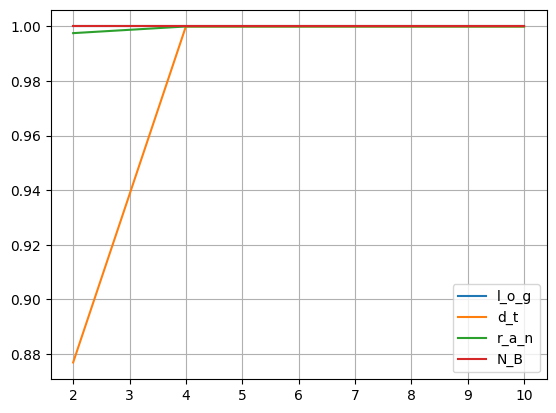

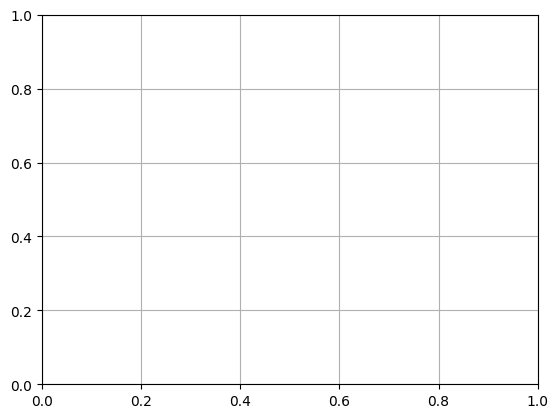

In [32]:
df_test.plot(grid = 1)
plt.show()
plt.grid()

***This code performs k-fold cross-validation for the Decision Tree classifier with a specific range of k-values.

***It initializes two dictionaries, test_scores and train_scores, to store the test and train scores for different values of k.

***It loops over a range of k-values, in this case, 2 to 4 with a step of 2, to perform k-fold cross-validation.

***For each value of k, it initializes a KFold object with n_splits=i.

***Inside the loop, it splits the data into train and test sets using kf.split().

***It then fits a Decision Tree model on the training data using dt.fit(), calculates the train and test 
scores using dt.score() and accuracy_score(), respectively, and sums up the scores for each fold.

***After looping over all folds, it computes the average train and test scores for the current k-value and stores
them in the respective dictionaries using test_scores[i] and train_scores[i].

***Finally, it prints the k-value and returns the dictionaries containing the train and test scores.

In [33]:
test_scores={}
train_scores={}
for i in range(2,4,2):
    kf = KFold(n_splits = i)
    sum_train = 0
    sum_test = 0
    data = df
    for train,test in kf.split(data):
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["prognosis"],axis=1)
        y_train = train_data['prognosis']
        x_test = test_data.drop(["prognosis"],axis=1)
        y_test = test_data["prognosis"]
        algo_model = dt.fit(x_train,y_train)
        sum_train += dt.score(x_train,y_train)
        y_pred = dt.predict(x_test)
        sum_test += accuracy_score(y_test,y_pred)
    average_test = sum_test/i
    average_train = sum_train/i
    test_scores[i] = average_test
    train_scores[i] = average_train
    print("kvalue: ",i)  

kvalue:  2


In [34]:
print(train_scores)
print(test_scores)

{2: 1.0}
{2: 0.8707317073170732}


In [35]:
import joblib
joblib.dump(dt, 'my_model_for_healthcare')

['my_model_for_healthcare']

***This code defines a simple diagnostic system that takes input from the user about their symptoms 
and predicts the most likely infection based on a trained Random Forest model.

***It starts by loading a dataset in CSV format containing information about various symptoms and infections. 
Then, it prompts the user to enter their name and age.

***Next, the user is asked to select the symptoms they are currently experiencing from a list of options. 
The selected symptoms are then converted into a binary vector to be passed as input to the Random Forest model.

***After this, the Random Forest model is loaded with 100 estimators and trained on the symptom data.

***Finally, the selected symptoms are passed to the Random Forest model to predict the most likely infection along with 
a confidence score. The results are printed to the console, including the user's name and age.

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

def get_user_input():
    name = input('Enter your name: ')
    age = None
    while not age:
        try:
            age = int(input('Enter your age: '))
        except ValueError:
            print('Invalid age. Please enter a number.')
    return name, age

def select_symptoms(df):
    for i, col in enumerate(df.columns):
        print(f"{i+1}: {col}")

    choices = input('Enter the names of the symptoms that are present (separated by space): ')
    selected_cols = [col.strip() for col in choices.split()]
    selected_indices = {i for i, col in enumerate(df.columns) if col in selected_cols}

    if len(selected_indices) != len(selected_cols):
        print('Invalid input. Please enter valid symptom names.')
        return select_symptoms(df)

    return selected_indices

def diagnose_infection(symptoms, rf):
    diagnosis = rf.predict([symptoms])[0]
    confidence = rf.predict_proba([symptoms]).max() * 100
    return diagnosis, confidence

if __name__ == '__main__':
    # Load dataset
    df = pd.read_csv('Training.csv')

    # Get user input
    name, age = get_user_input()

    # Select symptoms
    selected_indices = select_symptoms(df)

    # Update symptom list
    symptoms = [0] * (len(df.columns) - 1)
    for i in selected_indices:
        symptoms[i-1] = 1

    # Load random forest model
    rf = RandomForestClassifier(n_estimators=100)
    X = df.drop('prognosis', axis=1).values
    y = df['prognosis'].values
    rf.fit(X, y)

    # Diagnose infection
    diagnosis, confidence = diagnose_infection(symptoms, rf)

    # Print results
    print(f"Name of the infection: {diagnosis}, confidence score: {confidence:.2f}%")
    print(f"Name: {name}, Age: {age}")

Enter your name: Hashim AHmed
Enter your age: 24
1: itching
2: skin_rash
3: nodal_skin_eruptions
4: continuous_sneezing
5: shivering
6: chills
7: joint_pain
8: stomach_pain
9: acidity
10: ulcers_on_tongue
11: muscle_wasting
12: vomiting
13: burning_micturition
14: spotting_ urination
15: fatigue
16: weight_gain
17: anxiety
18: cold_hands_and_feets
19: mood_swings
20: weight_loss
21: restlessness
22: lethargy
23: patches_in_throat
24: irregular_sugar_level
25: cough
26: high_fever
27: sunken_eyes
28: breathlessness
29: sweating
30: dehydration
31: indigestion
32: headache
33: yellowish_skin
34: dark_urine
35: nausea
36: loss_of_appetite
37: pain_behind_the_eyes
38: back_pain
39: constipation
40: abdominal_pain
41: diarrhoea
42: mild_fever
43: yellow_urine
44: yellowing_of_eyes
45: acute_liver_failure
46: fluid_overload
47: swelling_of_stomach
48: swelled_lymph_nodes
49: malaise
50: blurred_and_distorted_vision
51: phlegm
52: throat_irritation
53: redness_of_eyes
54: sinus_pressure
55: r